In [1]:
#Description

In [89]:
# On importe ce dont on a besoin

import openpyxl  # Bibliothèque permettant de travailler avec des fichiers Excel
import matplotlib.pyplot as plt  # Bibliothèque de traçage de graphiques en Python
from matplotlib.ticker import ScalarFormatter  # Permet de formater les étiquettes sur les axes des graphiques
from collections import Counter  # Permet de compter les occurrences d'éléments dans une liste
import numpy as np

In [88]:
def lire_fichier_texte(nom_fichier):
    '''Fonction qui lit un fichier texte et le transforme en un tableau'''

    tableau = []  # Initialise une liste vide pour stocker les données du fichier

    # Ouvre le fichier en mode lecture ('r') et le traite ligne par ligne
    with open(nom_fichier, 'r') as f:
        # Pour chaque ligne dans le fichier
        for ligne in f:
            # Divise la ligne en une liste d'entiers en utilisant split() et convertit chaque élément en entier avec int(x)
            entiers = [int(x) for x in ligne.split()]
            # Ajoute la liste d'entiers à la liste tableau
            tableau.append(entiers)
    
    # Affiche un message indiquant que le fichier a été importé avec succès
    print("Fichier", nom_fichier, "importé !")
    
    # Retourne le tableau contenant les données du fichier
    return tableau

In [5]:
#À executer en troisième

BGC_5 = lire_fichier_texte("BGC_5.txt")
BGC_6 = lire_fichier_texte("BGC_6.txt")
BGC_7 = lire_fichier_texte("BGC_7.txt")

Fichier BGC_5.txt importé !
Fichier BGC_6.txt importé !
Fichier BGC_7.txt importé !


In [6]:
def bin_rep(x, n):
    '''Renvoie la représentation binaire de x avec un rembourrage jusqu'à n bits.'''
    b = bin(x)[2:]  # La tête est supprimée
    res = [int(i) for i in b]  # Chaque chiffre de la représentation binaire est converti en entier
    res = [0]*(n-len(res)) + res  # Les zéros manquants sont ajoutés pour atteindre la longueur spécifiée n
    return res

In [7]:
def convertir_en_binaire(tableau, n):
    '''Convertit chaque élément du tableau en sa représentation binaire avec un rembourrage à 5 bits.'''
    tableau_binaire = []

    # Pour chaque ligne dans le tableau
    for ligne in tableau:
        # Convertit chaque nombre de la ligne en sa représentation binaire avec un rembourrage à 5 bits
        ligne_binaire = [bin_rep(nombre, n) for nombre in ligne]
        # Ajoute la ligne convertie au tableau binaire
        tableau_binaire.append(ligne_binaire)

    # Retourne le tableau contenant les éléments convertis en binaire
    print("Le tableau a été converti !")
    return tableau_binaire

In [8]:
BGC_5_binary=convertir_en_binaire(BGC_5, 5)
BGC_6_binary=convertir_en_binaire(BGC_6[:100], 6)
BGC_7_binary=convertir_en_binaire(BGC_7, 7)

Le tableau a été converti !
Le tableau a été converti !
Le tableau a été converti !


In [9]:
def plot_values(arr, xlabel='', ylabel='', title='', filename='plot.png'):
    """
    Trace un graphique à partir d'un tableau de valeurs.

    Args:
    - arr (list): Le tableau de valeurs à tracer
    - xlabel (str): L'étiquette de l'axe des abscisses (optionnel)
    - ylabel (str): L'étiquette de l'axe des ordonnées (optionnel)
    - title (str): Le titre du graphique (optionnel)
    - filename (str): Le nom du fichier dans lequel enregistrer le graphique (optionnel)

    Returns:
    - None
    """
    # Vérifie si le tableau est vide
    if not arr:
        print("Le tableau est vide.")
        return

    # Crée une nouvelle figure pour le graphique avec une taille spécifique
    plt.figure(figsize=(8, 6))

    # Trace le graphique en reliant les points avec des lignes et en les marquant avec des cercles
    plt.plot(arr, marker='o', linestyle='-')

    # Ajoute des étiquettes pour les axes x et y, ainsi qu'un titre pour le graphique
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Active la grille sur le graphique
    plt.grid(True)

    # Désactive la notation scientifique sur l'axe y
    plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

    # Enregistre le graphique dans un fichier spécifié et l'affiche
    plt.savefig(filename)
    plt.show()

    # Ferme la figure pour libérer la mémoire
    plt.close()

In [10]:
def sauvegarder_tableau(tableau, nom_fichier):
    with open(nom_fichier, 'w') as f:
        for ligne in tableau:
            f.write(' '.join(map(str, ligne)) + '\n')

In [11]:
#partie analyse

In [12]:
def count_ones_2d(tableau):
    """
    Compte le nombre de 1 dans chaque cellule du tableau 3D et renvoie un tableau 2D du résultat.
    
    Args:
    - tableau (list): Un tableau 3D contenant des cellules avec des valeurs binaires
    
    Returns:
    - list: Un tableau 2D contenant le nombre de 1 dans chaque cellule
    """
    # Initialise un tableau 2D pour stocker le nombre de 1 dans chaque cellule
    tableau_counts = []
    
    # Parcourt chaque cellule du tableau 3D
    for cellule in tableau:
        # Initialise un tableau pour stocker le nombre de 1 dans chaque ligne de la cellule
        cellule_counts = []
        # Parcourt chaque ligne de la cellule
        for ligne in cellule:
            # Compte le nombre de 1 dans cette ligne et l'ajoute au tableau de décomptes de la cellule
            cellule_counts.append(sum(ligne))
        # Ajoute les décomptes de la cellule au tableau de décomptes global
        tableau_counts.append(cellule_counts)
    
    # Retourne le tableau 2D contenant le nombre de 1 dans chaque cellule
    print("Le tableau est prêt")
    return tableau_counts

In [13]:
BGC_5_binary_count_ones=count_ones_2d(BGC_5_binary)
BGC_6_binary_count_ones=count_ones_2d(BGC_6_binary)
BGC_7_binary_count_ones=count_ones_2d(BGC_7_binary)

Le tableau est prêt
Le tableau est prêt
Le tableau est prêt


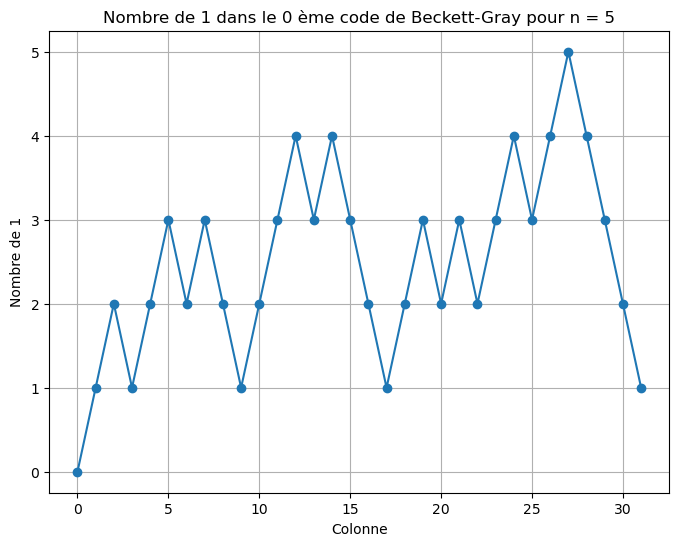

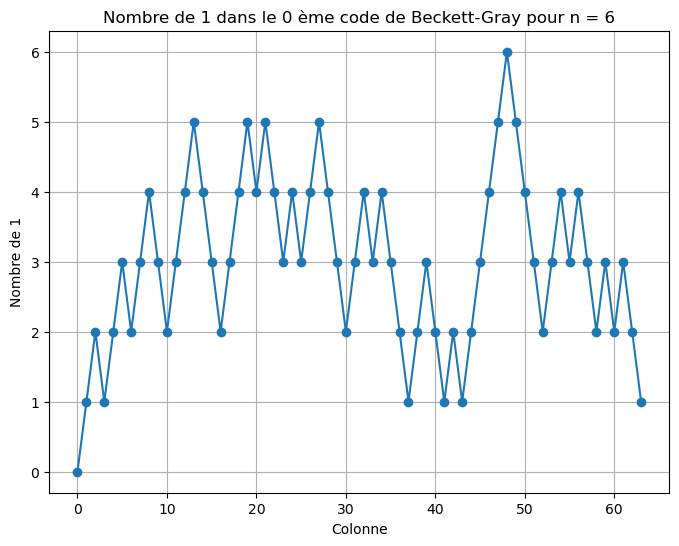

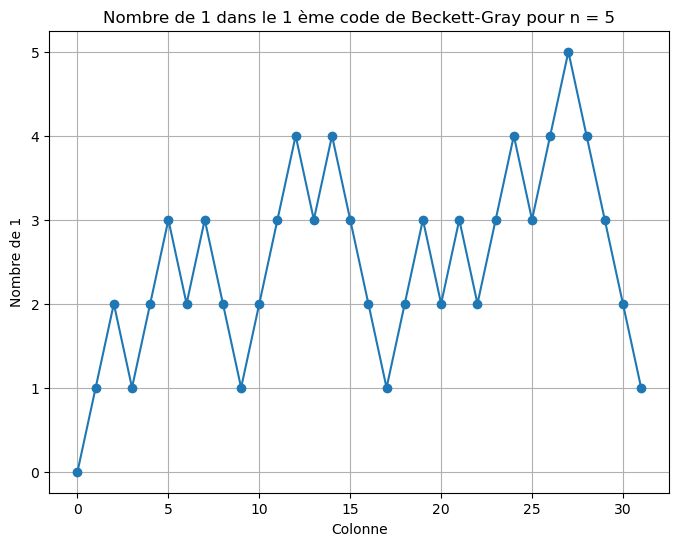

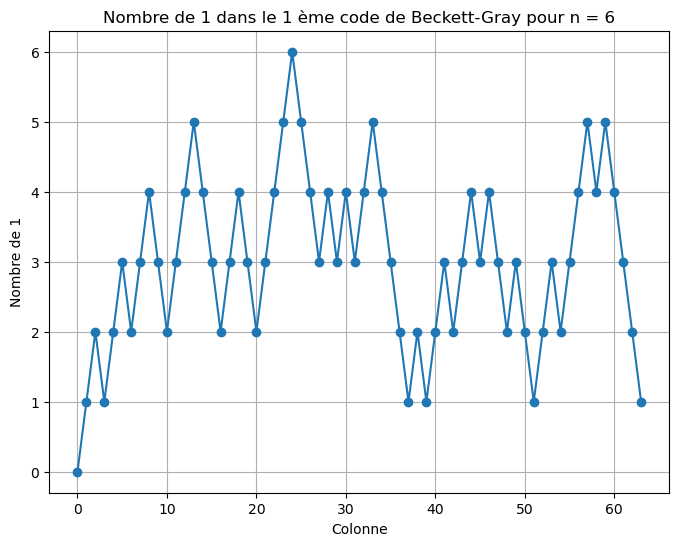

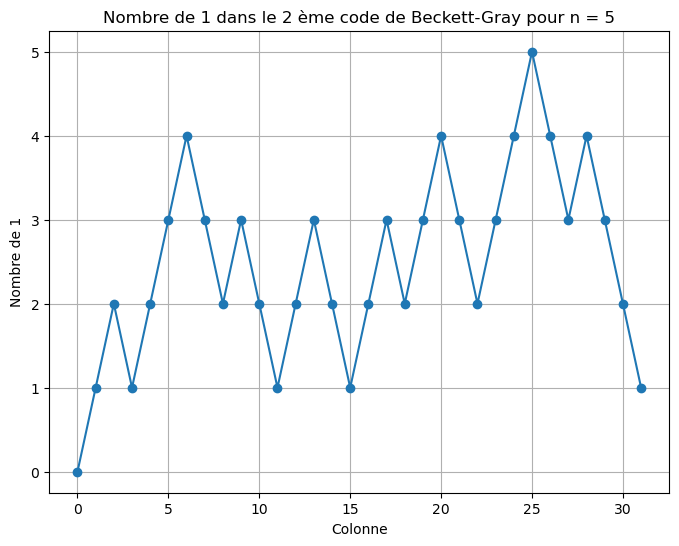

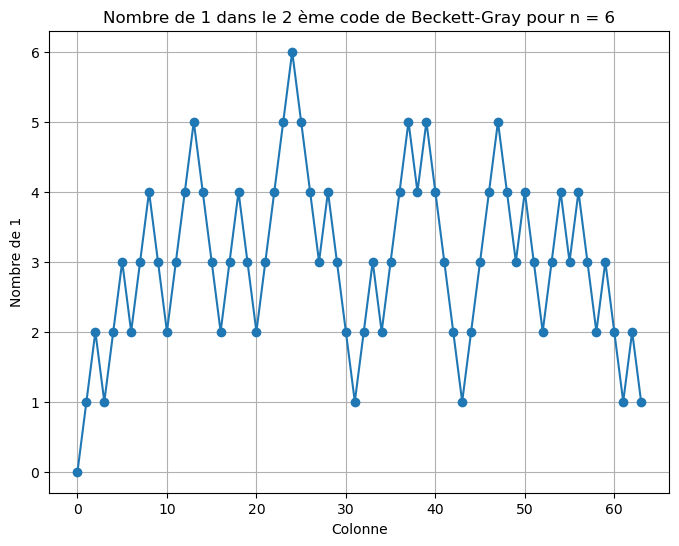

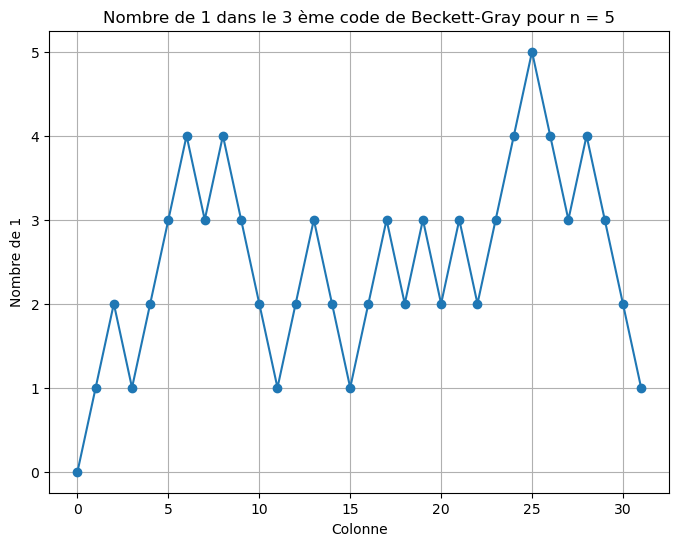

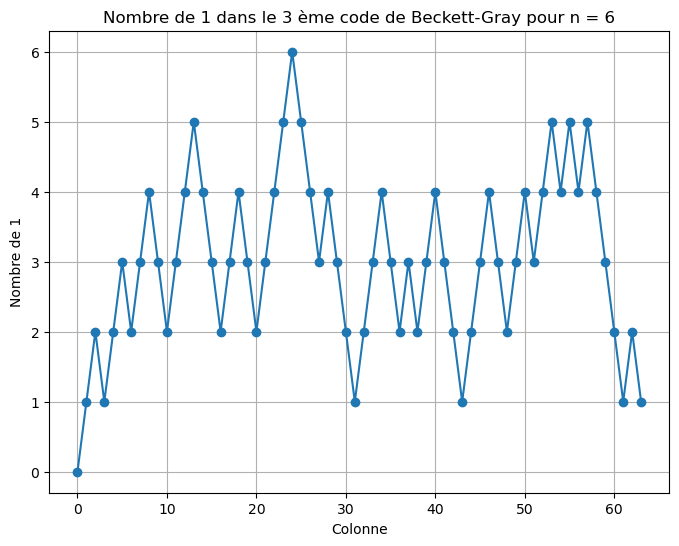

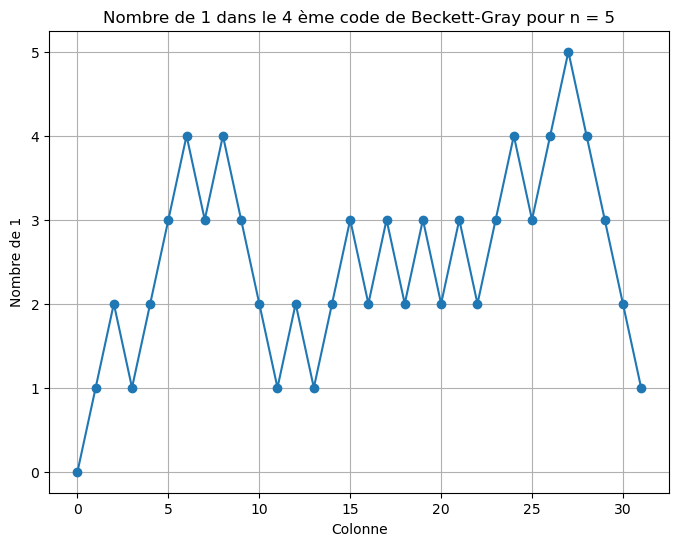

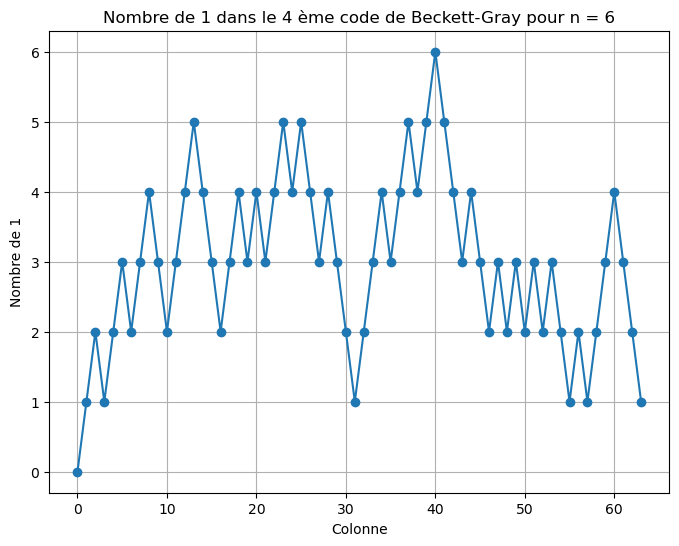

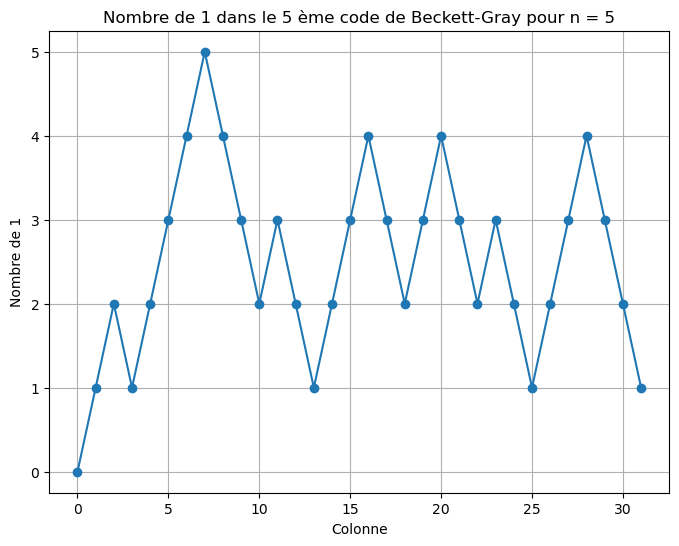

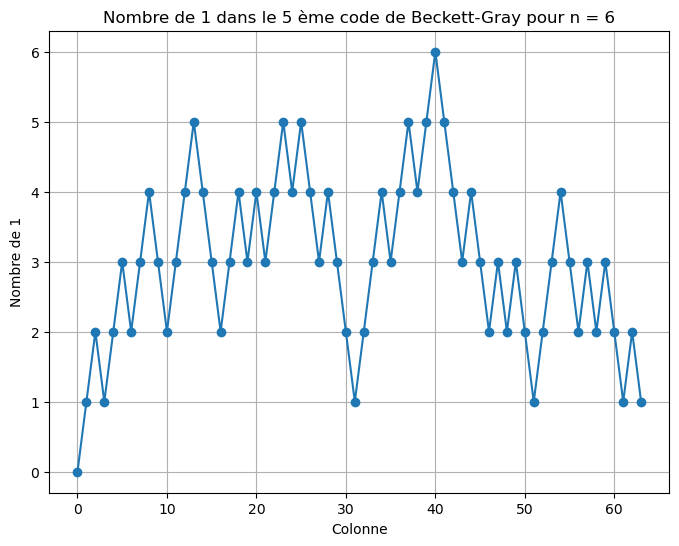

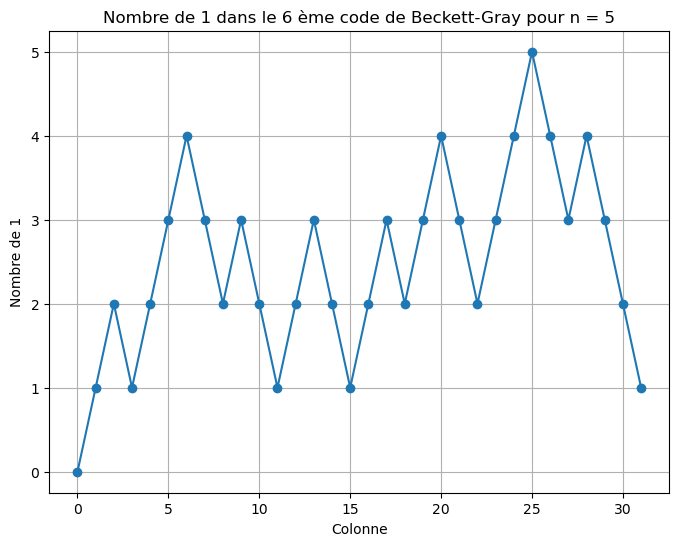

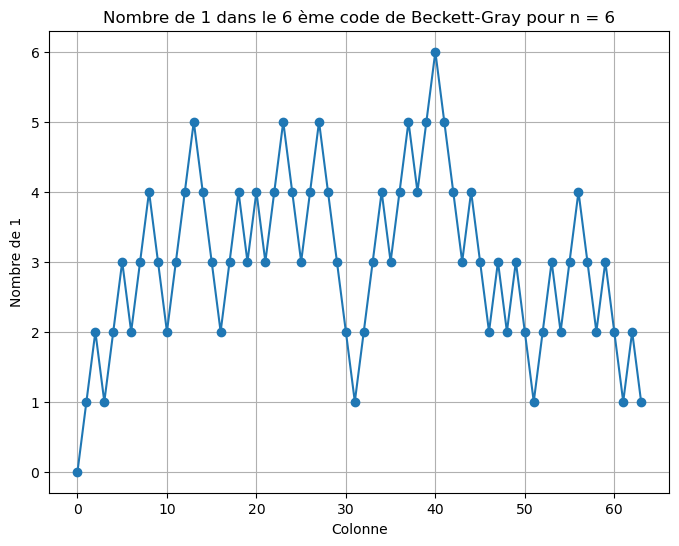

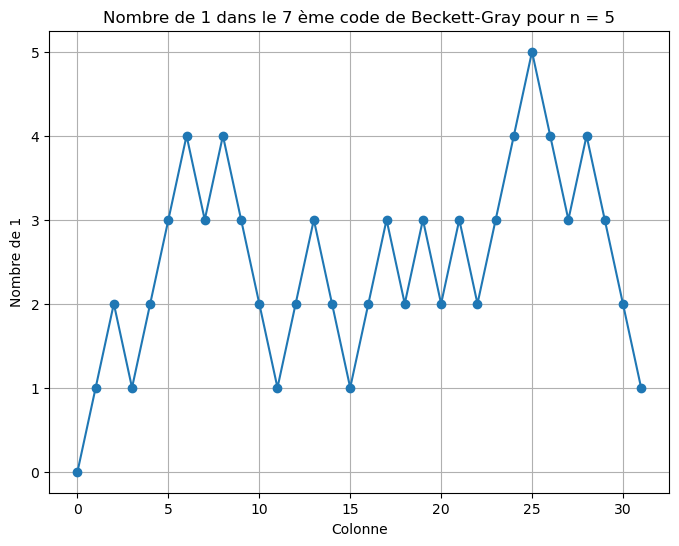

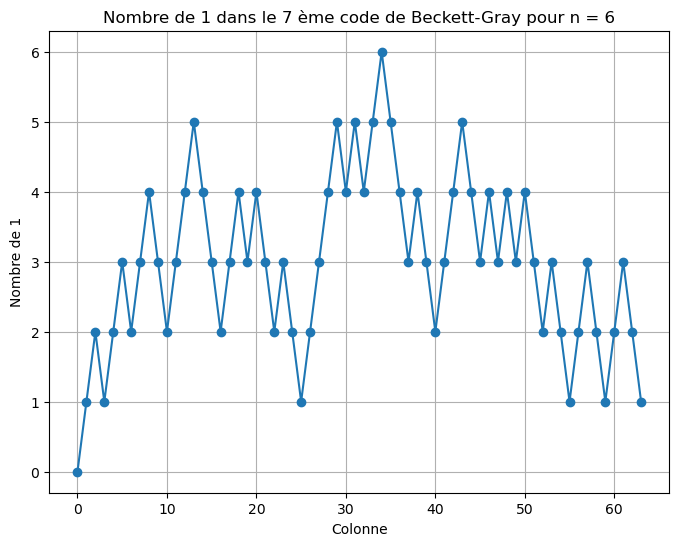

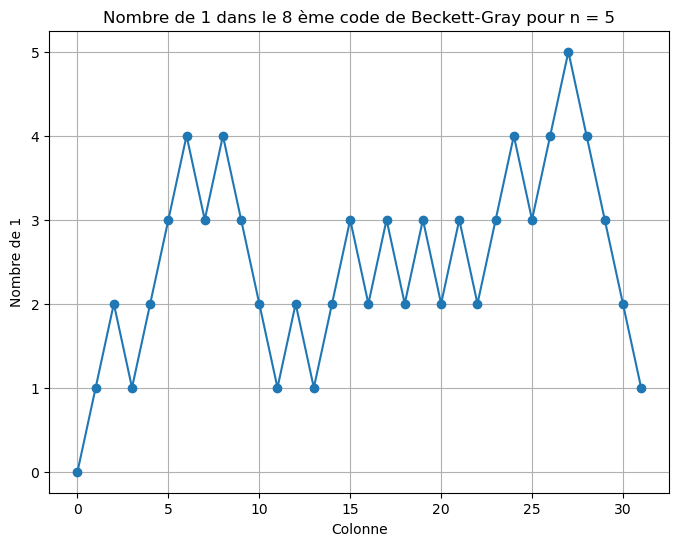

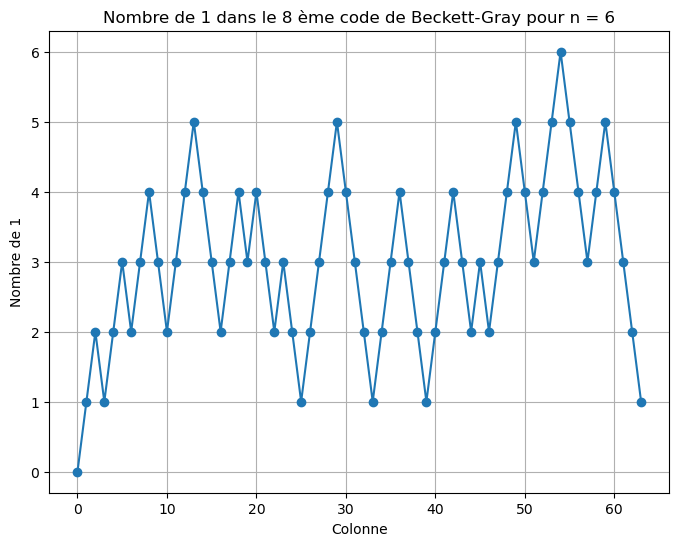

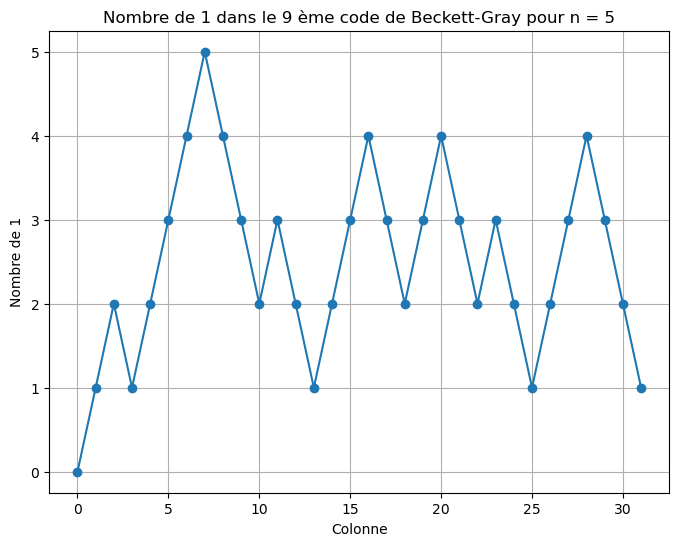

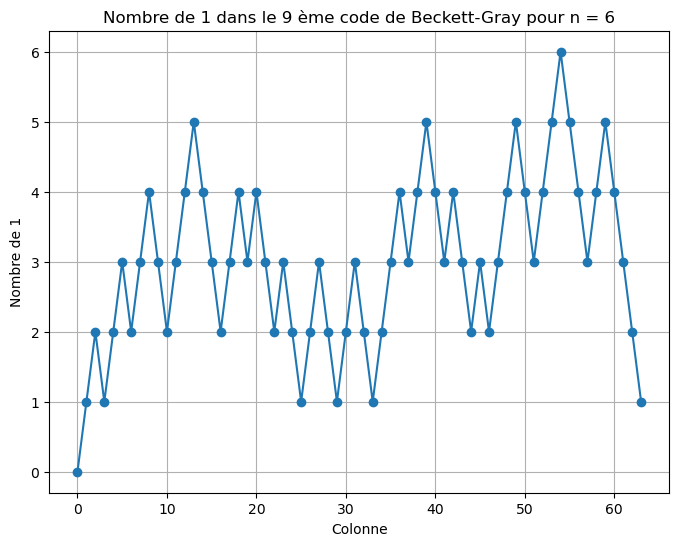

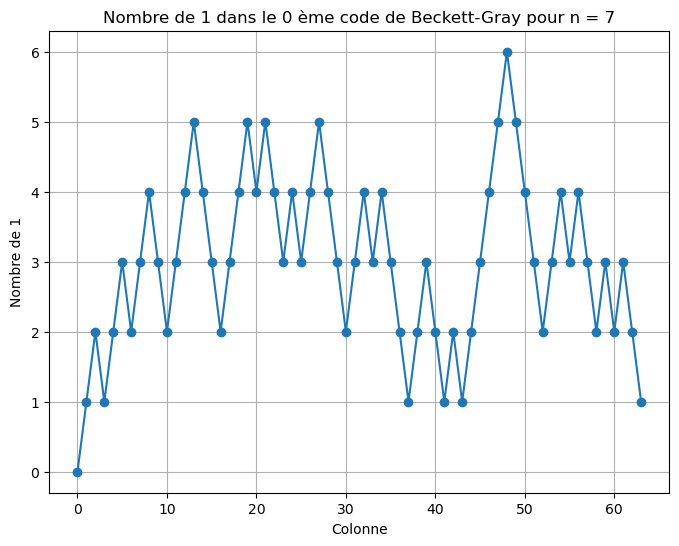

In [93]:
for i in range(10):
    plot_values(BGC_5_binary_count_ones[i], "Colonne", "Nombre de 1", "Nombre de 1 dans le " + str(i) + " ème code de Beckett-Gray pour n = 5", "BGC_5_nb_ones_line_"+str(i)+".png")
    plot_values(BGC_6_binary_count_ones[i], "Colonne", "Nombre de 1", "Nombre de 1 dans le " + str(i) + " ème code de Beckett-Gray pour n = 6", "BGC_6_nb_ones_line_"+str(i)+".png")

plot_values(BGC_6_binary_count_ones[0], "Colonne", "Nombre de 1", "Nombre de 1 dans le 0 ème code de Beckett-Gray pour n = 7", "BGC_7_nb_ones_line_0.png")

In [15]:
def sum_columns_2d_array(arr_2d):
    """
    Calcule la somme des colonnes d'un tableau 2D.

    Args:
    - arr_2d (list): Un tableau 2D contenant des valeurs numériques

    Returns:
    - list: Une liste contenant la somme de chaque colonne du tableau 2D
    """
    # Vérifie si le tableau 2D est vide
    if not arr_2d:
        return []  # Si le tableau est vide, retourne une liste vide
    
    # Détermine le nombre de colonnes dans le tableau 2D en utilisant la longueur de la première ligne
    num_columns = len(arr_2d[0])
    
    # Initialise une liste pour stocker les sommes des colonnes, toutes initialisées à 0
    column_sums = [0] * num_columns
    
    # Parcourt chaque ligne du tableau 2D
    for row in arr_2d:
        # Parcourt chaque élément de la ligne avec son index
        for i, value in enumerate(row):
            # Ajoute la valeur de l'élément à la somme de la colonne correspondante
            column_sums[i] += value
    
    # Retourne la liste contenant la somme de chaque colonne du tableau 2D
    return column_sums

In [16]:
#On complète BGC_6 en rajoutant les codes de gray reverse
BGC_6_reverse=BGC_6[:]

for i in range(len(BGC_6)):
    BGC_6_reverse.append(BGC_6[i][::-1])

In [17]:
sum_col_BGC_5 = sum_columns_2d_array(BGC_5) # Pour BGC_5
sum_col_BGC_6 = sum_columns_2d_array(BGC_6_reverse) # Pour BGC_6

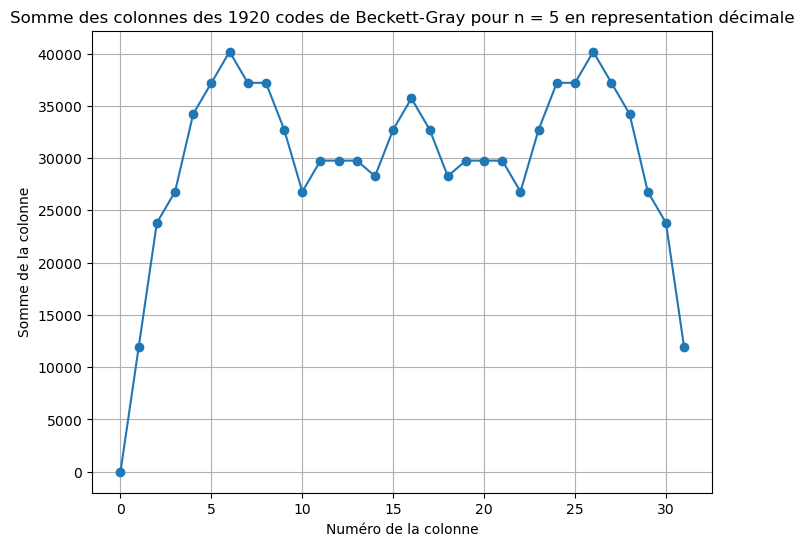

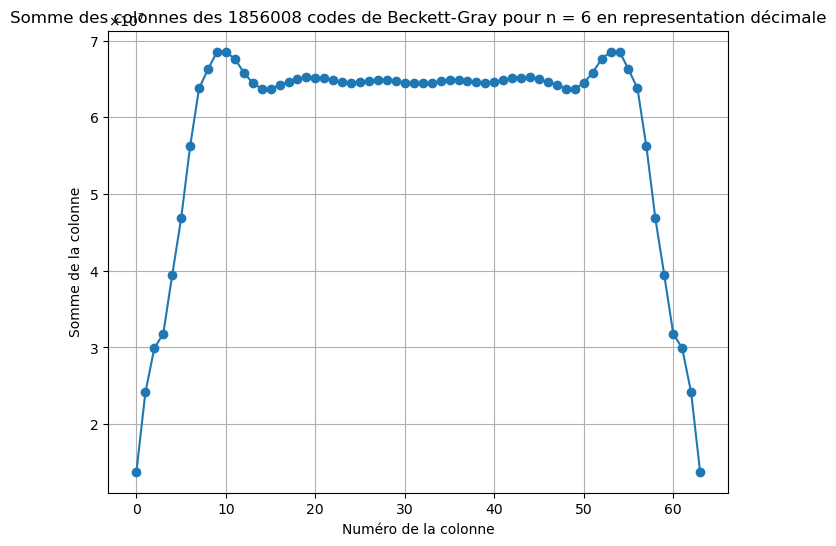

In [92]:
plot_values(sum_col_BGC_5, "Numéro de la colonne", "Somme de la colonne", "Somme des colonnes des 1920 codes de Beckett-Gray pour n = 5 en representation décimale", "sum_col_BGC_5.png")
plot_values(sum_col_BGC_6, "Numéro de la colonne", "Somme de la colonne", "Somme des colonnes des 1856008 codes de Beckett-Gray pour n = 6 en representation décimale", "sum_col_BGC_6.png")

In [22]:
def most_frequent_numbers_per_column(tableau):
    """
    Trouve les valeurs les plus fréquentes pour chaque colonne d'un tableau.

    Args:
    - tableau (list): Un tableau 2D contenant des valeurs numériques

    Returns:
    - list: Une liste contenant les valeurs les plus fréquentes pour chaque colonne du tableau
    """
    # Initialise une liste pour stocker les résultats
    resultats = []

    # Parcourt chaque colonne du tableau
    for colonne in range(len(tableau[0])):
        # Extrait les valeurs de la colonne en cours
        valeurs_colonne = [ligne[colonne] for ligne in tableau]
        
        # Compte le nombre d'occurrences de chaque valeur dans la colonne
        compteur = Counter(valeurs_colonne)
        
        # Trouve la valeur la plus fréquente dans la colonne et sa fréquence
        valeur_plus_frequente, frequence_max = compteur.most_common(1)[0]

        # Trouve toutes les autres valeurs ayant la même fréquence maximale
        autres_valeurs_frequentes = [v for v, f in compteur.items() if f == frequence_max]
        
        # Ajoute les valeurs les plus fréquentes pour cette colonne aux résultats
        resultats.append(autres_valeurs_frequentes)

    # Retourne la liste des valeurs les plus fréquentes pour chaque colonne du tableau
    return resultats

In [23]:
FreqNumBGC5=most_frequent_numbers_per_column(BGC_5)
FreqNumBGC6=most_frequent_numbers_per_column(BGC_6)

print("Nombre les plus fréquents par colonne pour BGC_5 : ", FreqNumBGC5)
print("Nombre les plus fréquents par colonne pour BGC_6 : ", FreqNumBGC6)

Nombre les plus fréquents par colonne pour BGC_5 :  [[0], [1, 2, 4, 8, 16], [3, 5, 9, 17, 6, 10, 18, 12, 20, 24], [2, 4, 8, 16, 1], [15, 23, 27, 29, 30], [31], [15, 23, 30, 27, 29], [31], [29, 27, 23, 15, 30], [25, 21, 13, 26, 28, 22, 14, 19, 11, 7], [10, 18, 24, 17, 9, 6, 20, 5, 12, 3], [11, 19, 16, 28, 8, 21, 13, 7, 4, 25, 31, 26, 2, 22, 14, 1], [17, 20, 9, 12, 5, 24, 18, 10, 6, 3], [19, 11, 21, 13, 7, 25, 26, 22, 14, 28], [5, 12, 20, 9, 24, 17, 10, 18, 6, 3], [21, 13, 14, 22, 25, 26, 11, 19, 28, 7], [30, 29, 27, 23, 15], [22, 19, 26, 14, 11, 7, 28, 25, 21, 13], [12, 20, 18, 10, 24, 6, 9, 17, 5, 3], [28, 26, 22, 14, 19, 11, 7, 21, 13, 25], [24, 10, 18, 20, 6, 12, 17, 9, 5, 3], [26, 14, 21, 22, 13, 25, 4, 31, 2, 8, 11, 16, 19, 7, 28, 1], [18, 10, 12, 5, 20, 6, 9, 24, 17, 3], [22, 14, 28, 13, 21, 26, 25, 11, 19, 7], [30, 29, 15, 23, 27], [31], [15, 23, 27, 30, 29], [31], [29, 27, 23, 15, 30], [4, 2, 16, 8, 1], [17, 9, 10, 18, 20, 12, 5, 6, 24, 3], [16, 8, 4, 2, 1]]
Nombre les plus fréq

In [25]:
def max_consecutive_ones(matrix):
    # Vérifie si le tableau est vide et retourne une liste vide le cas échéant
    if not matrix:
        return []

    # Obtient le nombre de lignes et de colonnes du tableau
    num_rows = len(matrix)
    num_cols = len(matrix[0])
    
    # Initialise une liste pour stocker le nombre maximal de bits à 1 consécutifs pour chaque colonne
    max_ones = [0] * num_cols
    
    # Parcourt chaque colonne du tableau
    for col in range(num_cols):
        # Initialise les compteurs pour le maximum de bits à 1 consécutifs et le compte courant
        max_count = 0
        current_count = 0
        
        # Parcourt chaque ligne de la colonne courante
        for row in range(num_rows):
            # Vérifie si le bit actuel est 1
            if matrix[row][col] == 1:
                # Incrémente le compteur courant de bits à 1 consécutifs
                current_count += 1
                # Met à jour le maximum de bits à 1 consécutifs si le compteur courant est plus grand
                max_count = max(max_count, current_count)
            else:
                # Réinitialise le compteur courant si le bit actuel n'est pas 1
                current_count = 0
        
        # Enregistre le maximum de bits à 1 consécutifs trouvé pour la colonne courante
        max_ones[col] = max_count
    
    # Retourne la liste des maxima de bits à 1 consécutifs pour chaque colonne
    return max_ones

In [28]:
# On regarde le borne sup et inf des intervalles de longueur maximale

max_BGC_5_max_intervalle_length=[]
min_BGC_5_max_intervalle_length=[]
max_BGC_6_max_intervalle_length=[]
min_BGC_6_max_intervalle_length=[]
max_BGC_7_max_intervalle_length=[]
min_BGC_7_max_intervalle_length=[]

for i in range(90):
    max_BGC_5_max_intervalle_length.append(max(max_consecutive_ones(BGC_5_binary[i])))
    min_BGC_5_max_intervalle_length.append(min(max_consecutive_ones(BGC_5_binary[i])))
    max_BGC_6_max_intervalle_length.append(max(max_consecutive_ones(BGC_6_binary[i])))
    min_BGC_6_max_intervalle_length.append(min(max_consecutive_ones(BGC_6_binary[i])))

max_BGC_7_max_intervalle_length.append(max(max_consecutive_ones(BGC_7_binary[0])))
min_BGC_7_max_intervalle_length.append(min(max_consecutive_ones(BGC_7_binary[0])))

print("La borne inférieur du plus grand intervalle de bit à 1 consécutif pour un BG n = 5 est " + str(min(min_BGC_5_max_intervalle_length)))
print("La borne supérieure du plus grand intervalle de bit à 1 consécutif pour un BG  n = 5 est " + str(min(max_BGC_5_max_intervalle_length)))
print("La borne inférieur du plus grand intervalle de bit à 1 consécutif pour un BG  n = 6 est " + str(min(min_BGC_6_max_intervalle_length)))
print("La borne supérieure du plus grand intervalle de bit à 1 consécutif pour un BG  n = 6 est " + str(min(max_BGC_6_max_intervalle_length)))
print("La borne inférieur du plus grand intervalle de bit à 1 consécutif pour un BG  n = 7 est " + str(min(min_BGC_7_max_intervalle_length)))
print("La borne supérieure du plus grand intervalle de bit à 1 consécutif pour un BG  n = 7 est " + str(min(max_BGC_7_max_intervalle_length)))


La borne inférieur du plus grand intervalle de bit à 1 consécutif pour n = 5 est 5
La borne supérieure du plus grand intervalle de bit à 1 consécutif pour n = 5 est 6
La borne inférieur du plus grand intervalle de bit à 1 consécutif pour n = 6 est 6
La borne supérieure du plus grand intervalle de bit à 1 consécutif pour n = 6 est 8
La borne inférieur du plus grand intervalle de bit à 1 consécutif pour n = 7 est 9
La borne supérieure du plus grand intervalle de bit à 1 consécutif pour n = 7 est 11


In [29]:
def circular_permutations_reverse(array):
    # Initialisation de la liste des indices qui contiendra les résultats finaux
    index = []
    
    # Boucle sur chaque élément de 'array'
    for k in range(len(array)):
        # Liste pour stocker les permutations circulaires inversées
        permutations = []
        
        # La longueur de l'élément actuel (on suppose que tous les éléments ont la même longueur)
        n = len(array[0])
        
        # Inversion de l'élément actuel
        arr_reverse = array[k][::-1]  # Inversion de la liste ou chaîne de caractères
        
        # Génération des permutations circulaires de l'élément inversé
        for i in range(n):
            permutation = arr_reverse[i:] + arr_reverse[:i]
            permutations.append(permutation)
        
        # Comparaison des permutations circulaires avec les éléments de 'array'
        for i in range(len(array)):
            for j in range(len(permutations)):
                if permutations[j] == array[i]:
                    # Ajout des indices de l'élément original et de la permutation trouvée
                    index.append([k, i])
    
    # Retourne la liste des indices des correspondances trouvées
    return index


In [129]:
CP_5_index = circular_permutations_reverse(BGC_5)
sauvegarder_tableau(CP_5_index, "CP_5_index.txt")

Permutations circulaires trouvées !


In [34]:
def separation_tableau(tableau):
    # Initialisation de la liste qui contiendra les paires uniques
    tableau_A = []
    
    # Initialisation d'un ensemble pour garder une trace des paires déjà vues
    elements_deja_vus = set()
    
    # Boucle sur chaque sous-tableau (paire) dans 'tableau'
    for sous_tableau in tableau:
        # Extraction des éléments de la paire
        a, b = sous_tableau
        
        # Vérifie si la paire (a, b) ou (b, a) n'a pas encore été vue
        if (a, b) not in elements_deja_vus and (b, a) not in elements_deja_vus:
            # Ajoute la paire (a, b) à la liste 'tableau_A'
            tableau_A.append((a, b))
            
            # Ajoute la paire (a, b) à l'ensemble des éléments déjà vus
            elements_deja_vus.add((a, b))
    
    # Retourne la liste des paires uniques
    return tableau_A

In [36]:
CP_5_index = lire_fichier_texte("CP5.txt")

Fichier CP5.txt importé !


In [37]:
index_of_reversed_to_erase = separation_tableau(CP_5_index)
BGC_5_without_reverse=[]

for i in range(len(index_of_reversed_to_erase)):
    BGC_5_without_reverse.append(BGC_5[index_of_reversed_to_erase[i][0]])

In [38]:
def taille_sous_tableau(tableau):
    taille_sous_tableaux = []

    for ligne in tableau:
        taille_sous_tableaux.append(len(ligne))

    return taille_sous_tableaux

In [39]:
def echanger_colonnes(tableau, colonne1, colonne2):
    for ligne in tableau:
        ligne[colonne1], ligne[colonne2] = ligne[colonne2], ligne[colonne1]

In [40]:
import itertools

def echange_lignes_permutations(tableau):
    permutations = []

    # Générer toutes les permutations possibles des indices de lignes
    indices_lignes = list(range(len(tableau[0])))
    permutations_indices_lignes = itertools.permutations(indices_lignes)

    # Pour chaque permutation d'indices de lignes, échanger les lignes correspondantes
    for permutation in permutations_indices_lignes:
        nouveau_tableau=[]
        for j in range(len(tableau)):
            nouveau_tableau.append([tableau[j][i] for i in permutation])
        #je devrais faire les 32 d'un coup et retransformer ca en decimal
        permutations.append(nouveau_tableau)

    return permutations

In [41]:
def circular_permutations(array):
    n = len(array)
    permutations = []
    for i in range(n):
        # Utilisation de la rotation des éléments pour générer la permutation circulaire
        permutation = array[i:] + array[:i]
        permutations.append(permutation)
    return permutations

In [43]:
def binary_to_decimal(binary_list):
    binary_str = ''.join(map(str, binary_list))
    return int(binary_str, 2)

def transform_to_decimal(arr_3d):
    decimal_arr = []
    for sub_arr in arr_3d:
        decimal_sub_arr = [binary_to_decimal(row) for row in sub_arr]
        decimal_arr.append(decimal_sub_arr)
    return decimal_arr

resultat = transform_to_decimal(permutations)

In [46]:
#c'est ici qu'on supprime la plupart des codes isomorphes

all_isomorphism=[]
BGC_5_binary_without_reversed=convertir_en_binaire(BGC_5_without_reverse, 5)

for i in range(len(BGC_5_binary_without_reversed)):# pour chaque ligne, on va tester les isomorphismes
    permutations = echange_lignes_permutations(BGC_5_binary_without_reversed[i]) # ca fait 120 permutaitons de cette ligne
    resultat = transform_to_decimal(permutations) # on les mets en decimale
    for j in range(len(BGC_5_binary_without_reversed)):
        for k in range(len(resultat)):
            if (resultat[k]==BGC_5_without_reverse[j]):
                all_isomorphism.append((i,j)) #ajouter l'indice des deux lignes qui sont considérées comme isomorphes

Le tableau a été converti !


In [47]:
def find_connected_components(pairs):
    from collections import defaultdict

    # Construire le graphe
    graph = defaultdict(set)
    for a, b in pairs:
        graph[a].add(b)
        graph[b].add(a)
    
    # Fonction de DFS pour trouver toutes les composantes connexes
    def dfs(node, visited, component):
        stack = [node]
        while stack:
            curr = stack.pop()
            if curr not in visited:
                visited.add(curr)
                component.append(curr)
                for neighbor in graph[curr]:
                    if neighbor not in visited:
                        stack.append(neighbor)
        return component
    
    # Trouver toutes les composantes connexes
    visited = set()
    components = []
    for node in graph:
        if node not in visited:
            component = dfs(node, visited, [])
            components.append(component)
    
    return [tuple(sorted(component)) for component in components]

In [60]:

components = find_connected_components(all_isomorphism) #on trouve pour le moment 16 classe de codes isomorphes

not_isomorphic_16 = []
for i in range(16):
    not_isomorphic_16.append(BGC_5_without_reverse[components[i][0]])

not_isomorphic_16_binary=convertir_en_binaire(not_isomorphic_16, 5)

Le tableau a été converti !


In [57]:
#permutations = echange_lignes_permutations(not_isomorphic_16_binary[6]) # ca fait 120 permutaitons de la ligne 6, comme j'ai pas le temps je regarde à la main chaque ligne
#resultat = transform_to_decimal(permutations)# on les mets en decimale
#for i in range(120):
#    print(resultat[i])

#Voici enfin les 8 codes de Gray non isomorphes.
BGC_5_not_iso = [[0, 1, 3, 2, 6, 7, 5, 13, 9, 8, 10, 11, 27, 19, 23, 21, 20, 4, 12, 28, 24, 26, 18, 22, 30, 14, 15, 31, 29, 25, 17, 16],
 [0, 1, 3, 2, 6, 7, 15, 13, 9, 25, 24, 16, 17, 21, 5, 4, 20, 22, 18, 26, 30, 14, 12, 28, 29, 31, 23, 19, 27, 11, 10, 8],
 [0, 1, 3, 2, 6, 7, 15, 13, 29, 25, 24, 16, 17, 21, 5, 4, 20, 22, 18, 26, 10, 14, 12, 28, 30, 31, 23, 19, 27, 11, 9, 8],
 [0, 1, 3, 2, 6, 7, 15, 13, 29, 25, 24, 16, 20, 4, 5, 21, 17, 19, 18, 26, 10, 14, 12, 28, 30, 22, 23, 31, 27, 11, 9, 8],
 [0, 1, 3, 2, 6, 7, 15, 31, 29, 25, 24, 28, 20, 4, 12, 14, 30, 26, 18, 22, 23, 21, 5, 13, 9, 8, 10, 11, 27, 19, 17, 16], 
 [0, 1, 3, 2, 6, 14, 30, 28, 24, 25, 17, 21, 5, 4, 12, 13, 29, 31, 27, 19, 18, 26, 10, 8, 9, 11, 15, 7, 23, 22, 20, 16],
 [0, 1, 3, 7, 6, 4, 12, 8, 10, 26, 27, 31, 23, 21, 5, 13, 29, 28, 24, 16, 20, 22, 30, 14, 15, 11, 9, 25, 17, 19, 18, 2], 
 [0, 1, 3, 7, 6, 14, 15, 31, 29, 25, 17, 16, 24, 26, 10, 11, 27, 19, 23, 21, 20, 4, 5, 13, 9, 8, 12, 28, 30, 22, 18, 2]]

In [84]:
def compute_transition_dict(matrix):
    # Initialiser un dictionnaire pour stocker les transitions
    transition_dict = {}
    
    # Parcourir chaque ligne du tableau 2D
    for row in matrix:
        # Parcourir chaque élément de la ligne sauf le dernier
        for k in range(len(row)):
            i = row[k]       # Élément actuel
            j = row[(k + 1)%len(row)]   # Élément suivant
            
            # Si l'élément actuel n'est pas encore une clé dans le dictionnaire de transitions, l'ajouter
            if i not in transition_dict:
                transition_dict[i] = {}
            
            # Si l'élément suivant n'est pas encore une clé dans le sous-dictionnaire de l'élément actuel, l'ajouter
            if j not in transition_dict[i]:
                transition_dict[i][j] = 0
            
            # Incrémenter le compteur de transitions de l'élément actuel à l'élément suivant
            transition_dict[i][j] += 1
    
    # Retourner le dictionnaire de transitions complété
    return transition_dict

In [52]:
def dict_to_2d_array(data):
    # Trouver les dimensions du tableau 2D
    rows = max(data.keys()) + 1
    cols = max(max(subdict.keys()) for subdict in data.values()) + 1
    
    # Créer un tableau 2D rempli de zéros
    array = np.zeros((rows, cols))
    
    # Remplir le tableau 2D avec les valeurs du dictionnaire
    for row, subdict in data.items():
        for col, value in subdict.items():
            array[row, col] = value
    
    return array

In [85]:
import numpy as np

def min_max_normalization_2d(matrix, n):
    # Convertir la matrice en un array NumPy si ce n'est pas déjà fait
    matrix = np.array(matrix)
    normalized_matrix = (matrix ) / (n)
    
    return normalized_matrix

In [86]:
transition_BGC_5 = min_max_normalization_2d(dict_to_2d_array(compute_transition_dict(BGC_5)), 1920)
transition_BGC_6 = min_max_normalization_2d(dict_to_2d_array(compute_transition_dict(BGC_6[:100000])), 100000*6)
transition_BGC_7 = min_max_normalization_2d(dict_to_2d_array(compute_transition_dict(BGC_7)), 7)
transition_BGC_5_not_iso = dict_to_2d_array(compute_transition_dict(BGC_5_not_iso))
transition_CP5 = dict_to_2d_array(compute_transition_dict(BGC_5_without_reverse))
#transition_not_isomorphic_16_binary = dict_to_2d_array(compute_transition_dict(not_isomorphic_16_binary))

In [82]:
def plot_2d_array(array, x='', y='', title='', filename='plot.png'):
    plt.imshow(array, cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Probabilitié')
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.savefig(filename)
    plt.show()

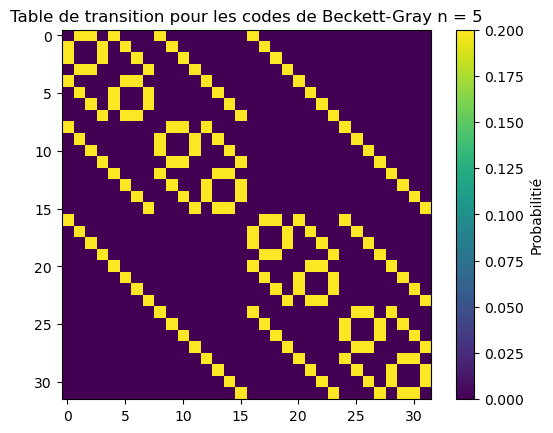

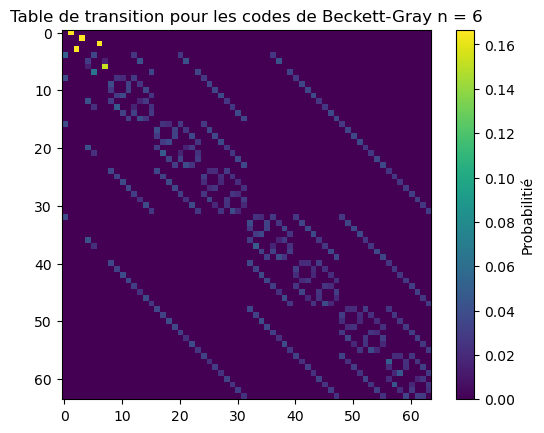

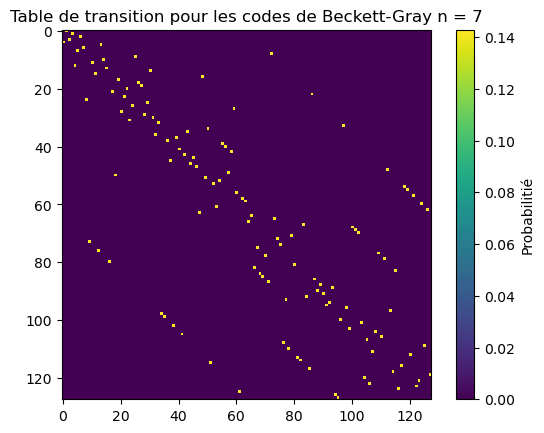

In [91]:

plot_2d_array(transition_BGC_5,"", "", "Table de transition pour les codes de Beckett-Gray n = 5", "transition_BGC_5.png")
plot_2d_array(transition_BGC_6, "", "", "Table de transition pour les codes de Beckett-Gray n = 6", "transition_BGC_6.png")
plot_2d_array(transition_BGC_7,"", "", "Table de transition pour les codes de Beckett-Gray n = 7", "transition_BGC_7.png")

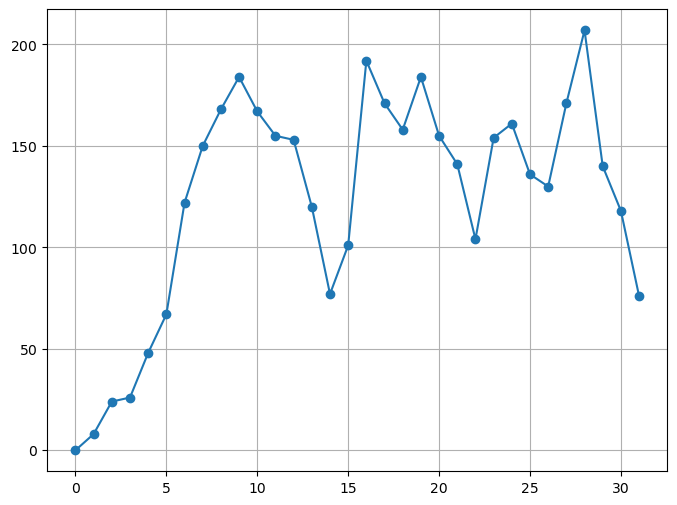

In [235]:
h = sum_columns_2d_array(BGC_5_not_iso)
plot_values(h)

Le tableau a été converti !
Le tableau est prêt


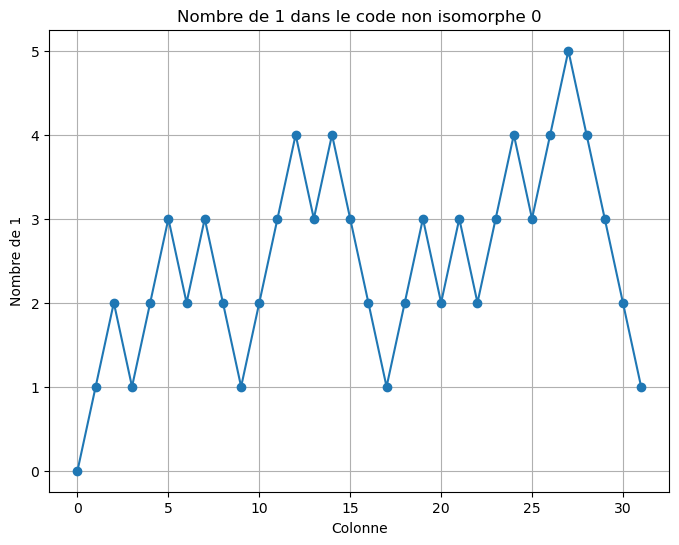

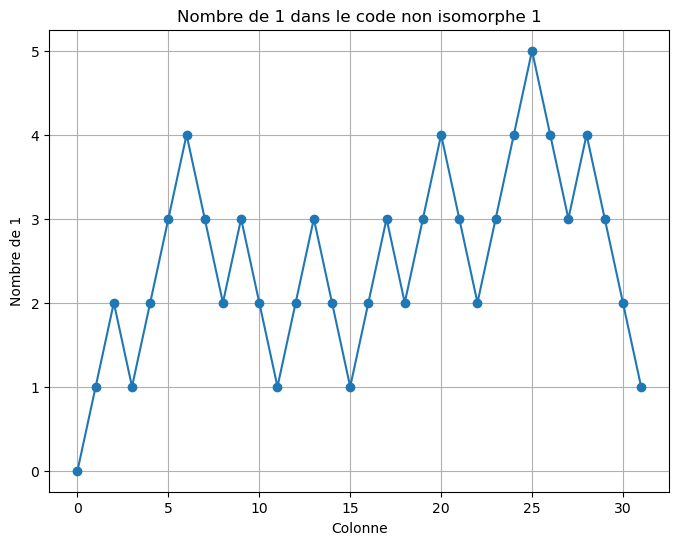

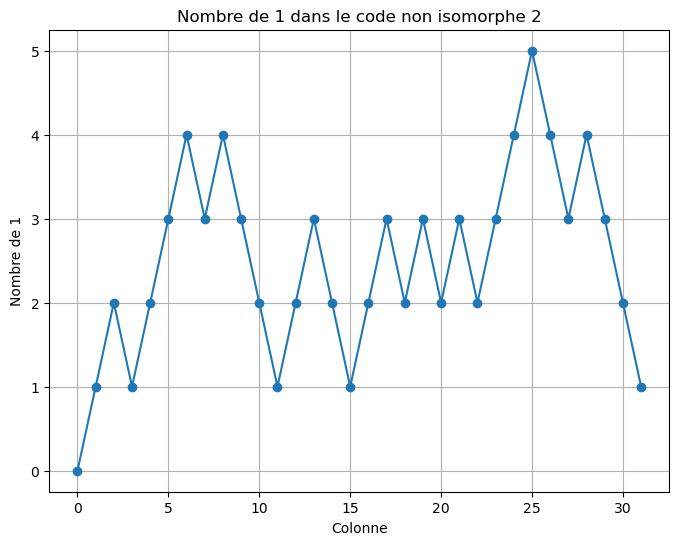

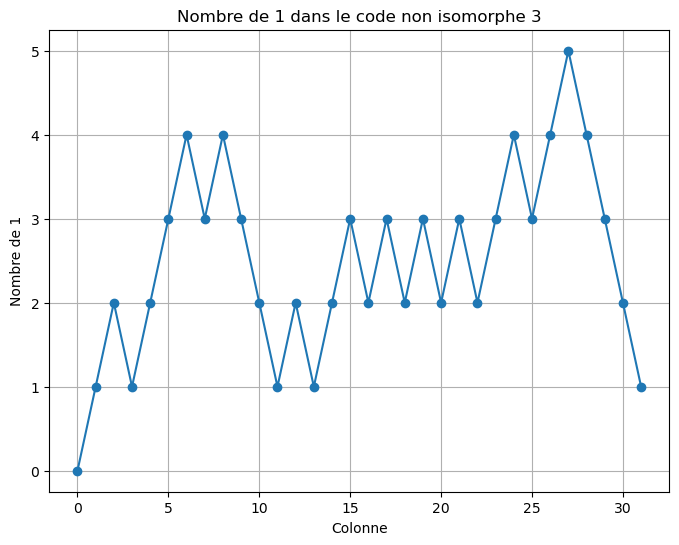

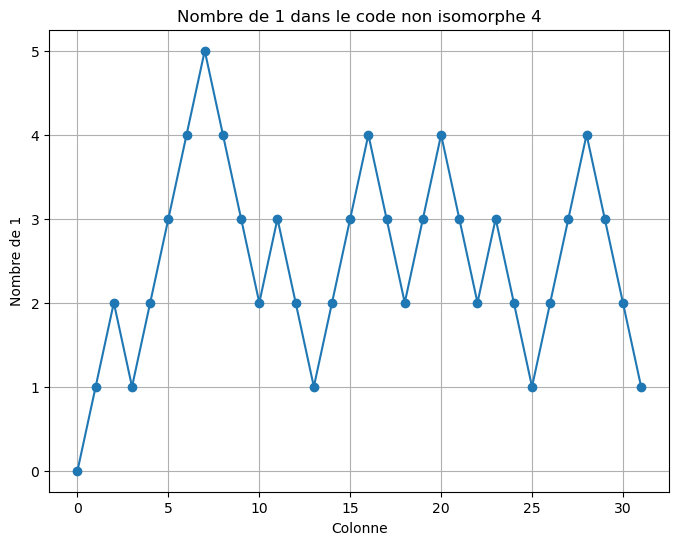

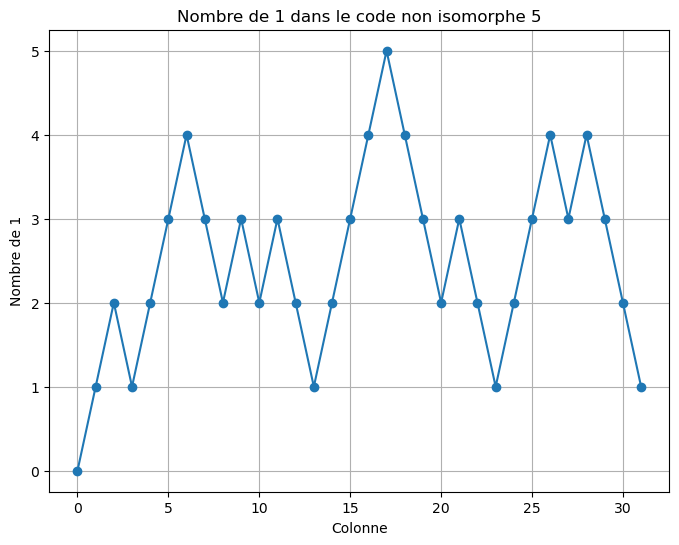

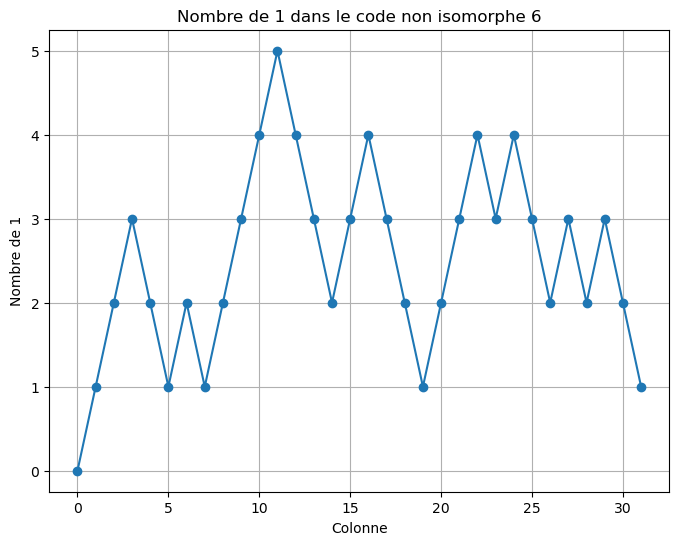

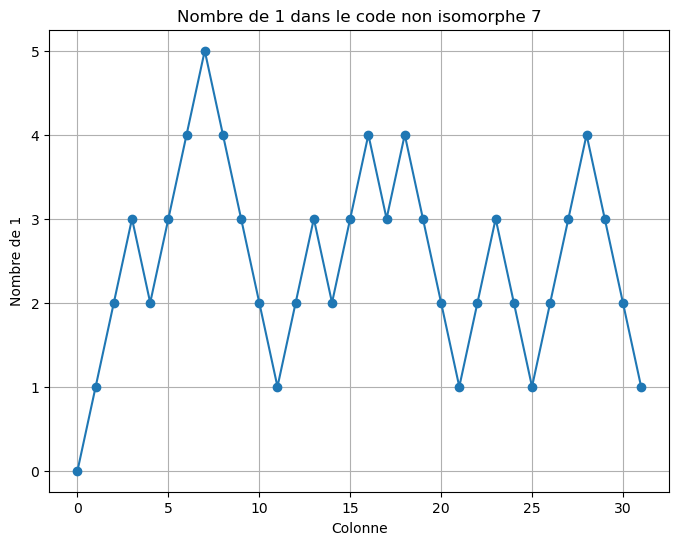

In [90]:
#ici on regarde le nombre de 1 dans la représentation binaire des 8 codes non isomorphes, pour une classe d'isomorphisme, on a le même graphe

aBGC_5_binary=convertir_en_binaire(BGC_5_not_iso, 5)
aBGC_5_binary_count_ones=count_ones_2d(aBGC_5_binary)

for i in range(8):
    plot_values(aBGC_5_binary_count_ones[i], "Colonne", "Nombre de 1", "Nombre de 1 dans le code non isomorphe " + str(i), str(i)+"_iso_nb_ones.png")